# Questions to Answer:

## Pre-Processing:
Which columns in the dataset need to be removed?
Is there any data missing?

# Code:

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

## Data Preprocessing:

https://github.com/MEDSL/2018-elections-unoffical/blob/master/election-context-2018.csv

In [ ]:
# grab raw data
url = 'https://github.com/MEDSL/2018-elections-unoffical/blob/master/election-context-2018.csv?raw=true'
df = pd.read_csv(url)
df.head()


,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0


In [ ]:
# let's view all the columns in our data.
df.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')

In [ ]:
print(df.dtypes)

state                      object
county                     object
fips                        int64
trump16                     int64
clinton16                   int64
otherpres16                 int64
romney12                    int64
obama12                     int64
otherpres12                 int64
demsen16                  float64
repsen16                  float64
othersen16                float64
demhouse16                float64
rephouse16                float64
otherhouse16              float64
demgov16                  float64
repgov16                  float64
othergov16                float64
repgov14                  float64
demgov14                  float64
othergov14                float64
total_population          float64
cvap                      float64
white_pct                 float64
black_pct                 float64
hispanic_pct              float64
nonwhite_pct              float64
foreignborn_pct           float64
female_pct                float64
age29andunder_

In [ ]:
# Let's see how much data we initially have to work with.
print('rows:', len(df))
print('columns:', len(df.columns))

rows: 3114
columns: 39


In [ ]:
# We care primarily about voter demographics in given counties/states as well as whether they voted blue or red for the governor election in 2014 and 2016.
# Let's confirm that there is enough governor data reported in each year.
df_governor = df[['state', 'county', 'demgov14', 'repgov14', 'demgov16', 'repgov16']]
df_governor.isnull().sum()

,0
state,0
county,0
demgov14,966
repgov14,966
demgov16,2513
repgov16,2513


In the above, we see that the 2016 governor election is missing a majority of its values. For this reason, we will focus on the 2014 governor election. Other important columns to our analysis therefore include the following:

```
['state', 'county', 'demgov14', 'repgov14', 'total_population', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct','age65andolder_pct','median_hh_inc','clf_unemploy_pct','lesshs_pct','lesscollege_pct','lesshs_whites_pct','rural_pct']
```

Note that we are only interested in voter demographics and whether or not they voted red or blue in the governor election. We won't need any columns that count the senate, house of representatives, or presidential vote for each county.

We will drop more columns as we continue our EDA.


In [ ]:
othergov = df['othergov14'] # hold onto this for future analysis
df = df[['state', 'county', 'demgov14', 'repgov14', 'total_population', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct','age65andolder_pct','median_hh_inc','clf_unemploy_pct','lesshs_pct','lesscollege_pct','lesshs_whites_pct','lesscollege_whites_pct','rural_pct']]
df.head()

,state,county,demgov14,repgov14,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,Alabama,Autauga,3638.0,9427.0,55049.0,75.683482,18.370906,2.572254,24.316518,1.838362,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162
1,Alabama,Baldwin,8416.0,37650.0,199510.0,83.178788,9.225603,4.366698,16.821212,3.269510,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099
2,Alabama,Barbour,3651.0,3111.0,26614.0,45.885624,47.888329,4.309762,54.114376,2.859397,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635
3,Alabama,Bibb,1368.0,3525.0,22572.0,74.765196,21.212121,2.223994,25.234804,1.351232,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607
4,Alabama,Blount,2178.0,12074.0,57704.0,87.657701,1.557951,8.727298,12.342299,4.271801,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502


In [ ]:
# we can see some row values are missing for some of the relevant columns.
df.isnull().sum()

,0
state,0
county,0
demgov14,966
repgov14,966
total_population,3
white_pct,3
black_pct,3
hispanic_pct,3
nonwhite_pct,3
foreignborn_pct,3


In [ ]:
# all empty rows are gone now!
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.isnull().sum()

<ipython-input-10-25340f1c28ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,0
index,0
state,0
county,0
demgov14,0
repgov14,0
total_population,0
white_pct,0
black_pct,0
hispanic_pct,0
nonwhite_pct,0


In [ ]:
# now we have less data to work with, but still a lot!
print('rows:', len(df))
print('columns:', len(df.columns))

rows: 2148
columns: 21


In [ ]:
# number of states in dataframe. 35 states are represented!
states_ct = len(df['state'].unique())
states_ct

35

In [ ]:
# number of counties represented per state. We can see that Texas, Georgia, and Kansas have the most counties and Hawaii has the least.
county_per_state = df.groupby('state')['county'].count().sort_values(ascending=False)
county_per_state

,county
state,
Texas,254
Georgia,159
Kansas,105
Illinois,102
Iowa,99
Tennessee,95
Nebraska,93
Ohio,88
Minnesota,87


In [ ]:
# another way of seeing states with max and min counties
print(f'Total # of counties: {county_per_state.sum()}')
print(f'Largest # of counties in a state: {county_per_state.max()} ({county_per_state.idxmax()})')
print(f'Smallest # of counties in a state: {county_per_state.min()} ({county_per_state.idxmin()})')

Total # of counties: 2148
Largest # of counties in a state: 254 (Texas)
Smallest # of counties in a state: 4 (Hawaii)


Since all the demographic data is reported in percentages, we can convert the governor vote columns into percentages as well to help with future analysis and statistical tests we want to do.

In [ ]:
# Note that we are calculating the percent in terms of the total population. We do this because
# the demographic data is calculated the same way.
df['demgov_pct'] = df['demgov14']/df['total_population']*100
df['repgov_pct'] = df['repgov14']/df['total_population']*100
df.head()

,index,state,county,demgov14,repgov14,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,demgov_pct,repgov_pct
0,0,Alabama,Autauga,3638.0,9427.0,55049.0,75.683482,18.370906,2.572254,24.316518,...,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,6.608658,17.124743
1,1,Alabama,Baldwin,8416.0,37650.0,199510.0,83.178788,9.225603,4.366698,16.821212,...,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,4.218335,18.871235
2,2,Alabama,Barbour,3651.0,3111.0,26614.0,45.885624,47.888329,4.309762,54.114376,...,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,13.718344,11.689336
3,3,Alabama,Bibb,1368.0,3525.0,22572.0,74.765196,21.212121,2.223994,25.234804,...,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,6.060606,15.616693
4,4,Alabama,Blount,2178.0,12074.0,57704.0,87.657701,1.557951,8.727298,12.342299,...,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,3.774435,20.924026


In [ ]:
# let's also add a male column since there's already a female column.
df['male_pct'] = 100-df['female_pct']
df.head()

,index,state,county,demgov14,repgov14,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,demgov_pct,repgov_pct,male_pct
0,0,Alabama,Autauga,3638.0,9427.0,55049.0,75.683482,18.370906,2.572254,24.316518,...,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,6.608658,17.124743,48.823775
1,1,Alabama,Baldwin,8416.0,37650.0,199510.0,83.178788,9.225603,4.366698,16.821212,...,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,4.218335,18.871235,48.805072
2,2,Alabama,Barbour,3651.0,3111.0,26614.0,45.885624,47.888329,4.309762,54.114376,...,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,13.718344,11.689336,53.501916
3,3,Alabama,Bibb,1368.0,3525.0,22572.0,74.765196,21.212121,2.223994,25.234804,...,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,6.060606,15.616693,53.535354
4,4,Alabama,Blount,2178.0,12074.0,57704.0,87.657701,1.557951,8.727298,12.342299,...,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,3.774435,20.924026,49.514765


Governor elections are decided by the popular vote. So, we will combine all the votes across all the counties for a given state as well as compute the average of percentages for different demographics across all the counties within a state.

In [ ]:
df_states = df[['male_pct','white_pct','lesscollege_whites_pct', 'rural_pct','black_pct', 'hispanic_pct', 'foreignborn_pct', 'female_pct', 'nonwhite_pct', 'age29andunder_pct', 'age65andolder_pct','lesshs_pct','lesscollege_pct','median_hh_inc','state']].groupby('state').agg('mean')
df_states

,male_pct,white_pct,lesscollege_whites_pct,rural_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,nonwhite_pct,age29andunder_pct,age65andolder_pct,lesshs_pct,lesscollege_pct,median_hh_inc
state,,,,,,,,,,,,,,
Alabama,48.725343,65.401427,80.153599,67.086050,28.623775,3.218275,2.315996,51.274657,34.598573,37.864079,16.930066,19.149822,83.080870,38834.925373
Arizona,50.447853,51.218119,73.624915,34.108520,1.783460,30.598920,10.399852,49.552147,48.781881,39.687833,18.951752,16.793000,80.589436,44166.533333
Arkansas,49.416507,75.926028,83.031027,64.870686,16.168268,4.950620,2.877551,50.583493,24.073972,37.333503,18.258998,17.518907,84.499622,37503.720000
California,50.686935,55.251999,67.973940,28.695742,2.958796,29.761858,17.019202,49.313065,44.748001,38.681232,15.962776,16.420405,73.988558,58091.241379
Colorado,51.526389,74.858416,65.609580,58.677927,1.531686,19.988524,6.429235,48.473611,25.141584,35.154120,17.294236,9.683520,69.555890,52243.593750
Connecticut,49.177432,76.541746,61.213892,24.174819,6.413566,11.136371,10.473621,50.822568,23.458254,36.922825,15.787725,9.045764,64.050653,72395.000000
Florida,51.299865,68.480885,76.397490,37.501188,14.280770,13.399822,9.509447,48.700135,31.519115,34.797398,20.310288,15.813913,78.984186,45205.373134
Georgia,49.603803,62.870658,79.330783,60.488954,28.034661,6.164262,4.604609,50.396197,37.129342,39.187771,15.635052,19.033958,82.428363,41727.547170
Hawaii,50.011913,27.456028,58.079098,16.570421,0.955928,10.828507,16.306319,49.988087,72.543972,36.755208,16.520346,8.391932,71.392465,67024.500000


In [ ]:
# calc dem and rep governor vote totals per state
df_state_totals = df[['state','demgov14','repgov14']].groupby('state').sum()
df_states['demgov14'] = df_state_totals.demgov14
df_states['repgov14'] = df_state_totals.repgov14
df_states

,male_pct,white_pct,lesscollege_whites_pct,rural_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,nonwhite_pct,age29andunder_pct,age65andolder_pct,lesshs_pct,lesscollege_pct,median_hh_inc,demgov14,repgov14
state,,,,,,,,,,,,,,,,
Alabama,48.725343,65.401427,80.153599,67.086050,28.623775,3.218275,2.315996,51.274657,34.598573,37.864079,16.930066,19.149822,83.080870,38834.925373,427218.0,747357.0
Arizona,50.447853,51.218119,73.624915,34.108520,1.783460,30.598920,10.399852,49.552147,48.781881,39.687833,18.951752,16.793000,80.589436,44166.533333,621435.0,799452.0
Arkansas,49.416507,75.926028,83.031027,64.870686,16.168268,4.950620,2.877551,50.583493,24.073972,37.333503,18.258998,17.518907,84.499622,37503.720000,350535.0,468017.0
California,50.686935,55.251999,67.973940,28.695742,2.958796,29.761858,17.019202,49.313065,44.748001,38.681232,15.962776,16.420405,73.988558,58091.241379,3856253.0,2640054.0
Colorado,51.526389,74.858416,65.609580,58.677927,1.531686,19.988524,6.429235,48.473611,25.141584,35.154120,17.294236,9.683520,69.555890,52243.593750,977711.0,921204.0
Connecticut,49.177432,76.541746,61.213892,24.174819,6.413566,11.136371,10.473621,50.822568,23.458254,36.922825,15.787725,9.045764,64.050653,72395.000000,548248.0,521645.0
Florida,51.299865,68.480885,76.397490,37.501188,14.280770,13.399822,9.509447,48.700135,31.519115,34.797398,20.310288,15.813913,78.984186,45205.373134,2795263.0,2861390.0
Georgia,49.603803,62.870658,79.330783,60.488954,28.034661,6.164262,4.604609,50.396197,37.129342,39.187771,15.635052,19.033958,82.428363,41727.547170,1138476.0,1341161.0
Hawaii,50.011913,27.456028,58.079098,16.570421,0.955928,10.828507,16.306319,49.988087,72.543972,36.755208,16.520346,8.391932,71.392465,67024.500000,181065.0,135742.0


In [ ]:
# create a new column that indicates whether a state turned red (republican) or blue (democrat) for their governor.
# 0 means they became blue, 1 means they became red
df_states['vote'] = np.where(df_states['demgov14'] > df_states['repgov14'], 0, 1)
df_states

,male_pct,white_pct,lesscollege_whites_pct,rural_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,nonwhite_pct,age29andunder_pct,age65andolder_pct,lesshs_pct,lesscollege_pct,median_hh_inc,demgov14,repgov14,vote
state,,,,,,,,,,,,,,,,,
Alabama,48.725343,65.401427,80.153599,67.086050,28.623775,3.218275,2.315996,51.274657,34.598573,37.864079,16.930066,19.149822,83.080870,38834.925373,427218.0,747357.0,1
Arizona,50.447853,51.218119,73.624915,34.108520,1.783460,30.598920,10.399852,49.552147,48.781881,39.687833,18.951752,16.793000,80.589436,44166.533333,621435.0,799452.0,1
Arkansas,49.416507,75.926028,83.031027,64.870686,16.168268,4.950620,2.877551,50.583493,24.073972,37.333503,18.258998,17.518907,84.499622,37503.720000,350535.0,468017.0,1
California,50.686935,55.251999,67.973940,28.695742,2.958796,29.761858,17.019202,49.313065,44.748001,38.681232,15.962776,16.420405,73.988558,58091.241379,3856253.0,2640054.0,0
Colorado,51.526389,74.858416,65.609580,58.677927,1.531686,19.988524,6.429235,48.473611,25.141584,35.154120,17.294236,9.683520,69.555890,52243.593750,977711.0,921204.0,0
Connecticut,49.177432,76.541746,61.213892,24.174819,6.413566,11.136371,10.473621,50.822568,23.458254,36.922825,15.787725,9.045764,64.050653,72395.000000,548248.0,521645.0,0
Florida,51.299865,68.480885,76.397490,37.501188,14.280770,13.399822,9.509447,48.700135,31.519115,34.797398,20.310288,15.813913,78.984186,45205.373134,2795263.0,2861390.0,1
Georgia,49.603803,62.870658,79.330783,60.488954,28.034661,6.164262,4.604609,50.396197,37.129342,39.187771,15.635052,19.033958,82.428363,41727.547170,1138476.0,1341161.0,1
Hawaii,50.011913,27.456028,58.079098,16.570421,0.955928,10.828507,16.306319,49.988087,72.543972,36.755208,16.520346,8.391932,71.392465,67024.500000,181065.0,135742.0,0


In [ ]:
print('rows:', len(df_states))
print('columns:', len(df_states.columns))

rows: 35
columns: 17


In [ ]:
# How many of the states that we have data for were red and blue in the 2014 governor election?
blue = len(df_states[df_states['vote']==0])
red = len(df_states[df_states['vote']==1])
blue, red

(11, 24)

County data is also critical as county demographics differ within states. We will focus on both the county and state demographics in our analysis.

In [ ]:
# create a new column that indicates whether a county turned red (republican) or blue (democrat) during the governor election.
# 0 means they became blue, 1 means they became red
df['vote'] = np.where(df['demgov14'] > df['repgov14'], 0, 1)

In [ ]:
# let's see some of the counties in NY that voted blue.
df_ny = df[df['state'] == 'New York']
ny_blue = df_ny[df_ny['vote']==0]
ny_blue.head()

,index,state,county,demgov14,repgov14,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,demgov_pct,repgov_pct,male_pct,vote
1244,1799,New York,Albany,36438.0,34368.0,307891.0,73.622483,11.806126,5.553264,26.377517,...,5.808791,7.294501,60.271663,5.402844,58.074333,9.696125,11.834708,11.162392,48.382057,0
1246,1801,New York,Bronx,113369.0,14414.0,1436785.0,9.597887,29.488337,55.414902,90.402113,...,12.666638,28.837398,80.868496,15.684287,64.106487,0.002816,7.890464,1.003212,47.080113,0
1247,1802,New York,Broome,24491.0,21021.0,197381.0,84.514214,4.874836,3.857514,15.485786,...,7.423663,9.796456,72.242353,8.600882,72.241597,26.056830,12.407983,10.649961,49.138975,0
1253,1808,New York,Clinton,10010.0,7254.0,81505.0,90.134348,4.037789,2.739709,9.865652,...,6.627042,13.622616,77.758661,12.013903,76.991063,64.155952,12.281455,8.900067,51.399301,0
1258,1813,New York,Erie,86550.0,71917.0,922129.0,76.325872,13.020087,5.070006,23.674128,...,6.120082,9.158043,67.800721,6.683255,65.472921,9.403834,9.385889,7.799017,48.394422,0


In [ ]:
# we can also look at the ones that voted red.
ny_red = df_ny[df_ny['vote']==1]
ny_red.head()

,index,state,county,demgov14,repgov14,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,...,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,demgov_pct,repgov_pct,male_pct,vote
1245,1800,New York,Allegany,2809.0,8022.0,47700.0,94.582809,1.419287,1.551363,5.417191,...,8.083277,10.952741,79.519853,10.827078,80.104146,78.739836,5.888889,16.817610,50.574423,1
1248,1803,New York,Cattaraugus,5941.0,11416.0,78506.0,91.061830,1.574402,1.948896,8.938170,...,7.492272,11.831007,81.872147,11.562757,81.803598,61.752805,7.567574,14.541564,49.416605,1
1249,1804,New York,Cayuga,8581.0,10099.0,78783.0,90.638843,4.093523,2.690936,9.361157,...,6.879557,12.376345,78.377500,10.690844,77.587987,55.781871,10.891944,12.818755,51.264867,1
1250,1805,New York,Chautauqua,12300.0,18855.0,131748.0,88.023348,2.400036,7.049822,11.976652,...,7.866205,11.798083,79.158863,9.914033,78.333939,43.862718,9.336005,14.311413,49.407202,1
1251,1806,New York,Chemung,7950.0,13001.0,87742.0,86.617583,5.632422,2.939299,13.382417,...,5.567271,9.786515,75.556071,8.108909,74.953264,24.178768,9.060655,14.817305,49.556655,1


In [ ]:
# We can also see how many counties were blue or red.
blue = len(df[df['vote']==0])
red = len(df[df['vote']==1])
blue, red

(360, 1788)

Notice that for each of the columns that are representative of voter demographics, values are recorded in percentages. Since we have the total population reported for a given county, we can convert these percentages to totals for each demographic reported in the data. This may be helpful in future analysis.

In [ ]:
df_totals = df.copy()
multiply_cols = [col for col in df_totals.columns if col.endswith('pct')]
for col in multiply_cols:
    df_totals[col[:-4]] = df_totals[col]/100 * df_totals['total_population']
    df_totals[col[:-4]] = df_totals[col[:-4]].astype(int) # converting to int since this represents people
    df_totals.drop(col, axis=1, inplace=True)
df_totals.head()
# demgov and repgov get recreated, so need to drop them. Index is also incorrect, needs to be dropped
df_totals.drop(['demgov','repgov','index'], axis=1)

,state,county,demgov14,repgov14,total_population,median_hh_inc,vote,white,black,hispanic,...,female,age29andunder,age65andolder,clf_unemploy,lesshs,lesscollege,lesshs_whites,lesscollege_whites,rural,male
0,Alabama,Autauga,3638.0,9427.0,55049.0,53099.0,1,41662,10112,1415,...,28171,22040,7694,3078,6835,41510,5506,40772,23121,26877
1,Alabama,Baldwin,8416.0,37650.0,199510.0,51365.0,1,165950,18406,8711,...,102139,70775,37337,12542,19895,140560,15646,136476,84351,97370
2,Alabama,Barbour,3651.0,3111.0,26614.0,33956.0,0,12211,12745,1146,...,12375,10024,4399,3413,6982,23189,5210,21654,18041,14238
3,Alabama,Bibb,1368.0,3525.0,22572.0,39776.0,1,16876,4787,502,...,10488,8426,3359,1613,4356,19863,3390,19744,15428,12083
4,Alabama,Blount,2178.0,12074.0,57704.0,46212.0,1,50581,899,5036,...,29132,21488,9920,3435,11522,50173,9603,49719,51905,28571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,Wyoming,Sweetwater,3886.0,6501.0,44812.0,68233.0,1,35766,388,7107,...,21431,19785,4220,2272,4174,35235,2795,34329,4891,23380
2144,Wyoming,Teton,3573.0,3998.0,22623.0,75594.0,1,18370,139,3432,...,10881,8046,2678,480,1048,10454,345,9449,10504,11741
2145,Wyoming,Uinta,1620.0,3251.0,20893.0,53323.0,1,18327,38,1872,...,10305,9027,2230,1335,2164,17089,1839,16940,9004,10587
2146,Wyoming,Washakie,498.0,2039.0,8351.0,46212.0,1,6881,66,1166,...,4288,2903,1640,621,1050,6590,860,6345,3002,4062


In [ ]:
print('rows:', len(df_totals))
print('columns:', len(df_totals.columns))

rows: 2148
columns: 25


In [ ]:
# We can also see the total population for a given demographic per state
state_totals = df_totals.groupby(['state','white','black','hispanic', 'nonwhite']).sum()
state_totals

index      county  demgov14  repgov14  \
state   white black hispanic nonwhite                                          
Alabama 1472  6970  52       7114         31      Greene    2857.0     538.0   
        2288  7967  13       8263          5     Bullock    2440.0     747.0   
        2577  7886  50       7987         42     Lowndes    3127.0    1174.0   
        2920  6759  93       6935         52       Perry    2627.0     961.0   
        3036  16049 323      16648        43       Macon    4828.0     829.0   
...                                      ...         ...       ...       ...   
Wyoming 31506 509   3492     6329       3091      Albany    4834.0    4403.0   
        35766 388   7107     9045       3109  Sweetwater    3886.0    6501.0   
        42546 360   4050     5926       3093    Campbell    1266.0    7665.0   
        70378 936   6629     10492      3103     Natrona    5795.0   12454.0   
        76225 2662  13697    20233      3101     Laramie    7778.0   14269.0   

                                       total_population  median_hh_inc  vote  \
state   white black hispanic nonwhite                                          
Alabama 1472  6970  52       7114                8587.0        21339.0     0   
        2288  7967  13       8263               10552.0        29335.0     0   
        2577  7886  50       7987               10565.0        27914.0     0   
        2920  6759  93       6935                9856.0        24912.0     0   
        3036  16049 323      16648              19684.0        32390.0     0   
...                                                 ...            ...   ...   
Wyoming 31506 509   3492     6329               37836.0        43043.0     0   
        35766 388   7107     9045               44812.0        68233.0     1   
        42546 360   4050     5926               48473.0        80822.0     1   
        70378 936   6629     10492              80871.0        56983.0     1   
        76225 2662  13697    20233              96459.0        61201.0     1   

                                       foreignborn  female  age29andunder  \
state   white black hispanic nonwhite                                       
Alabama 1472  6970  52       7114               22    4494           3228   
        2288  7967  13       8263              159    4833           4002   
        2577  7886  50       7987               32    5520           4070   
        2920  6759  93       6935               36    5185           4091   
        3036  16049 323      16648             221   10612           8382   
...                                            ...     ...            ...   
Wyoming 31506 509   3492     6329             2301   18069          20978   
        35766 388   7107     9045             2469   21431          19785   
        42546 360   4050     5926             1767   23271          21971   
        70378 936   6629     10492            2207   39968          32905   
        76225 2662  13697    20233            2946   47703          39322   

                                       age65andolder  clf_unemploy  lesshs  \
state   white black hispanic nonwhite                                        
Alabama 1472  6970  52       7114               1545          1558    1979   
        2288  7967  13       8263               1596          1399    3528   
        2577  7886  50       7987               1832          1295    2661   
        2920  6759  93       6935               1858          1156    2327   
        3036  16049 323      16648              3296          2959    3845   
...                                              ...           ...     ...   
Wyoming 31506 509   3492     6329               3612          1732    1592   
        35766 388   7107     9045               4220          2272    4174   
        42546 360   4050     5926               3371          2263    4037   
        70378 936   6629     10492             10372          3931    6738   
        76225 2662 

We need to also determine which individual states we want to look at in our analysis. In the above, we saw that Texas, Georgia, and Kansas have the most counties with relevant data across all states. We can focus on these states in our analysis.

## Analysis

We are primarily concerned about how the presence of certain demographics influences county and state level voting trends. Below, we can look at the average percent of voters of different demographics for all blue counties and all red counties and compare.

In [ ]:
# We can look at the average percent of voters of different demographics for red and blue counties.
df[['white_pct','lesscollege_whites_pct', 'rural_pct','black_pct', 'hispanic_pct', 'foreignborn_pct', 'female_pct', 'nonwhite_pct', 'age29andunder_pct', 'age65andolder_pct','lesshs_pct','lesscollege_pct','median_hh_inc','vote']].groupby('vote').agg('mean')

,white_pct,lesscollege_whites_pct,rural_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,nonwhite_pct,age29andunder_pct,age65andolder_pct,lesshs_pct,lesscollege_pct,median_hh_inc
vote,,,,,,,,,,,,,
0,60.787159,68.532654,41.799639,16.365916,15.13937,8.518081,50.186905,39.212841,39.081698,16.035943,14.164447,73.691238,49328.438889
1,79.609751,78.126091,60.164421,5.825592,10.23314,4.525103,49.786931,20.390249,36.934449,18.174715,13.675859,79.983140,48277.536913


We can also look at this on the state level.

In [ ]:
# We can look at the average percent of voters of different demographics for red and blue states.
df_states[['white_pct','lesscollege_whites_pct', 'rural_pct','black_pct', 'hispanic_pct', 'foreignborn_pct', 'female_pct', 'nonwhite_pct', 'age29andunder_pct', 'age65andolder_pct','lesshs_pct','lesscollege_pct','median_hh_inc','vote']].groupby('vote').agg('mean')

,white_pct,lesscollege_whites_pct,rural_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,nonwhite_pct,age29andunder_pct,age65andolder_pct,lesshs_pct,lesscollege_pct,median_hh_inc
vote,,,,,,,,,,,,,
0,77.025700,68.055676,42.527871,2.642019,9.987724,8.044209,50.082436,22.974300,36.041538,17.512314,10.268420,70.944900,58456.701121
1,76.106112,76.144184,55.923672,7.944009,10.258088,4.996196,49.933036,23.893888,37.125258,17.957560,13.298441,78.591743,48483.068644


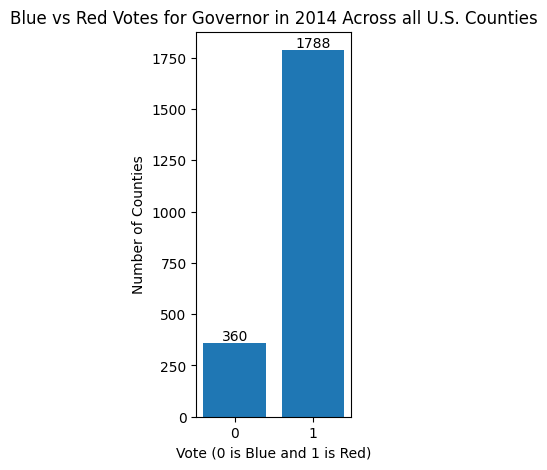

In [ ]:
#look at blue or red vote per county across the entire country.
vote_counties = df_totals['vote'].value_counts()
plt.figure(figsize=(2,5))
bars = plt.bar(vote_counties.index, vote_counties.values)
plt.bar_label(bars)
plt.title('Blue vs Red Votes for Governor in 2014 Across all U.S. Counties')
plt.xlabel('Vote (0 is Blue and 1 is Red)')
plt.ylabel('Number of Counties')
plt.show()

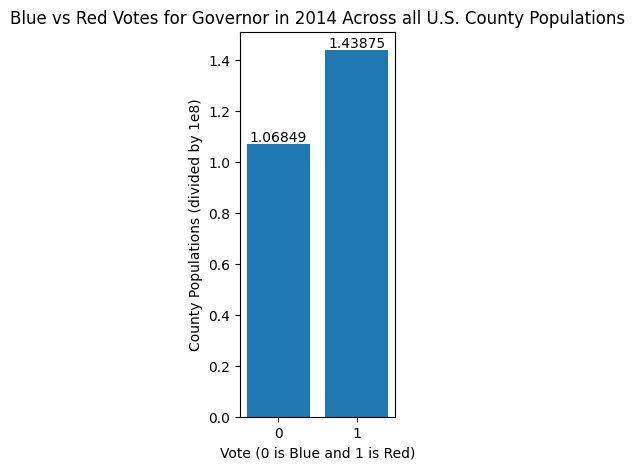

In [ ]:
# what does this look like on an individual level?
vote_totals = df_totals.groupby('vote')['total_population'].sum()/1e8 # very large numbers
plt.figure(figsize=(2,5))
bars = plt.bar(vote_totals.index, vote_totals.values)
plt.bar_label(bars)
plt.title('Blue vs Red Votes for Governor in 2014 Across all U.S. County Populations')
plt.xlabel('Vote (0 is Blue and 1 is Red)')
plt.ylabel('County Populations (divided by 1e8)')
plt.show()

Based on the above, it looks like the majority of the country voted red. This makes sense because as we showed earlier, there were more red states than blue states.

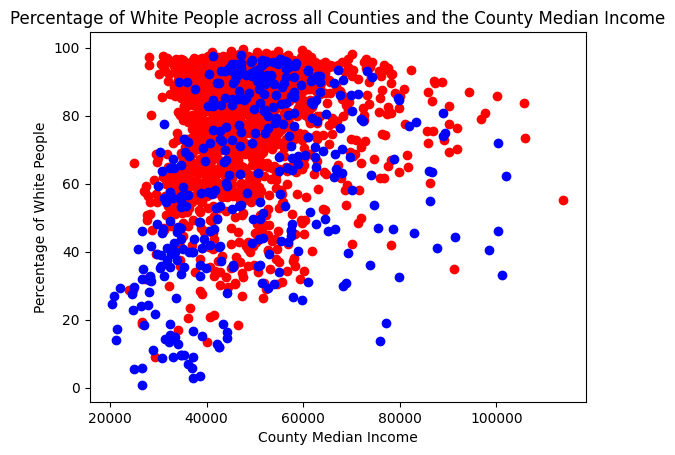

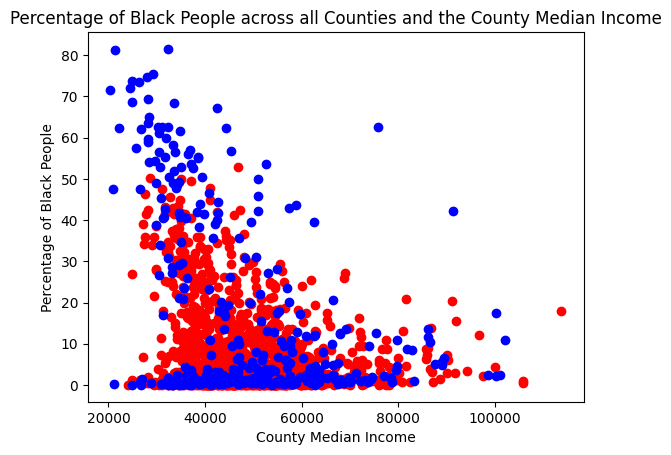

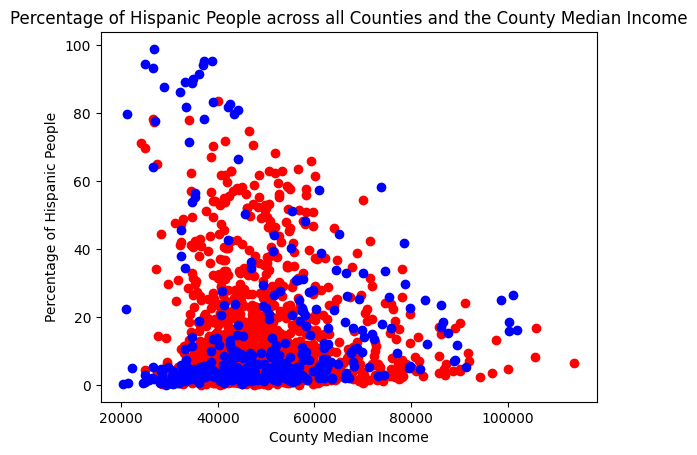

In [ ]:
# Let's look at how voting differs by race distribution within a county.
blue_votes = df[df['vote']==0]
red_votes = df[df['vote']==1]

white_blue = blue_votes['white_pct']
white_red = red_votes['white_pct']

black_blue = blue_votes['black_pct']
black_red = red_votes['black_pct']

hispanic_blue = blue_votes['hispanic_pct']
hispanic_red = red_votes['hispanic_pct']

plt.title("Percentage of White People across all Counties and the County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Percentage of White People")
plt.scatter(red_votes.median_hh_inc, white_red, color='red')
plt.scatter(blue_votes.median_hh_inc, white_blue, color='blue')
plt.show()

plt.title("Percentage of Black People across all Counties and the County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Percentage of Black People")
plt.scatter(red_votes.median_hh_inc, black_red, color='red')
plt.scatter(blue_votes.median_hh_inc, black_blue, color='blue')
plt.show()

plt.title("Percentage of Hispanic People across all Counties and the County Median Income")
plt.xlabel("County Median Income")
plt.ylabel("Percentage of Hispanic People")
plt.scatter(red_votes.median_hh_inc, hispanic_red, color='red')
plt.scatter(blue_votes.median_hh_inc, hispanic_blue, color='blue')
plt.show()

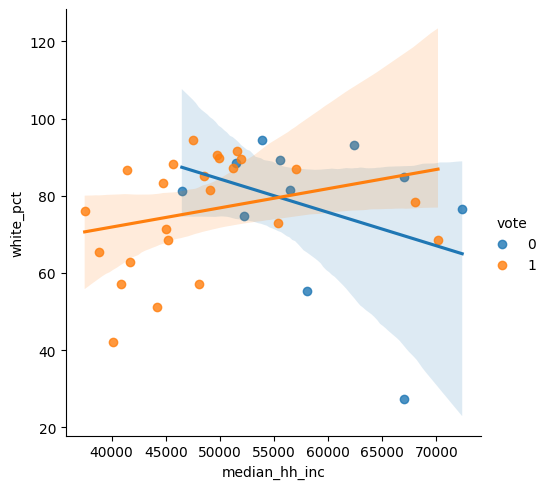

In [ ]:
# we can look at the same information on the state level.
sns.lmplot(data=df_states, x='median_hh_inc', y='white_pct', hue='vote');

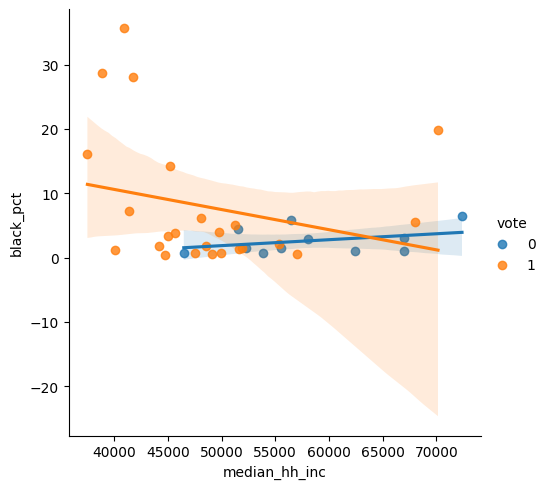

In [ ]:
sns.lmplot(data=df_states, x='median_hh_inc', y='black_pct', hue='vote');

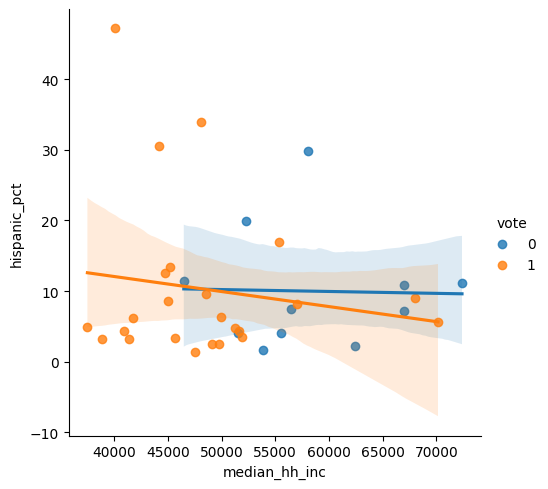

In [ ]:
sns.lmplot(data=df_states, x='median_hh_inc', y='hispanic_pct', hue='vote');

Let's look at other demographics, like education. We can perform statistical tests and calculate coefficients to determine whether or not certain levels of education within a county is correlated with the county's red or blue outcome.

In [ ]:
# correlation between pct of anyone with an education below the college level and county dem governor vote pct
outcome = df.demgov_pct
education = df.lesscollege_pct
correlation, p_value = stats.pearsonr(outcome, education)
print(f'correlation: {correlation}\np-value: {p_value}')
# negative correlation

correlation: -0.340662792336446
p-value: 1.6540383623291413e-59


In [ ]:
# correlation between pct of anyone with an education below the college level and county rep governor vote pct
outcome = df.repgov_pct
education = df.lesscollege_pct
correlation, p_value = stats.pearsonr(outcome, education)
print(f'correlation: {correlation}\np-value: {p_value}')
# based on values below, relationship is non-linear

correlation: -0.021036235274362186
p-value: 0.32981001132822135


In [ ]:
# correlation between pct of anyone with an education below the high school level and county dem governor vote pct
outcome = df.demgov_pct
education = df.lesshs_pct
correlation, p_value = stats.pearsonr(outcome, education)
print(f'correlation: {correlation}\np-value: {p_value}')
# democratic voters across counties negatively correlates with incomplete high school records

correlation: -0.3741290915899492
p-value: 2.474667357243934e-72


In [ ]:
# correlation between pct of anyone with an education below the high school level and county rep governor vote pct
outcome = df.repgov_pct
education = df.lesshs_pct
correlation, p_value = stats.pearsonr(outcome, education)
print(f'correlation: {correlation}\np-value: {p_value}')
# This correlation is even more negative than for democratic votes - Republicans care a little bit more about high school education?

correlation: -0.43905969278163487
p-value: 6.2926545462002425e-102


We can also examine the correlations between the percentages of voters in a rural location within a county and the county's red or blue outcome percentage.

In [ ]:
# correlation between pct of voters in rural location and county dem governor vote pct
outcome = df.demgov_pct
rural = df.rural_pct
correlation, p_value = stats.pearsonr(outcome, rural)
print(f'correlation: {correlation}\np-value: {p_value}')
# non-linear relationship

correlation: -0.011079045253713782
p-value: 0.6078169784461799


In [ ]:
# correlation between pct of voters in rural location and county rep governor vote pct
outcome = df.repgov_pct
rural = df.rural_pct
correlation, p_value = stats.pearsonr(outcome, rural)
print(f'correlation: {correlation}\np-value: {p_value}')
# highly correlated relationship with p-value close to 0! Reject null hypothesis!
# Suggests that those who live in rural areas feel more alignment with Republican ideology

correlation: 0.4296688692955366
p-value: 3.119289990609547e-97


In [ ]:
# let's check the correlation coefficients for all the columns in our data to see if there are any demographic variables that are highly correlated.
corr = df_totals[['white','lesscollege_whites', 'rural','black', 'hispanic', 'foreignborn', 'female', 'nonwhite', 'age29andunder', 'age65andolder','lesshs','lesscollege']].corr()
corr.style.background_gradient(cmap='coolwarm')

,white,lesscollege_whites,rural,black,hispanic,foreignborn,female,nonwhite,age29andunder,age65andolder,lesshs,lesscollege
white,1.000000,0.922901,0.404806,0.702305,0.696328,0.733968,0.918412,0.779517,0.905087,0.935414,0.775569,0.896959
lesscollege_whites,0.922901,1.000000,0.329562,0.770007,0.889807,0.889570,0.986467,0.940066,0.986003,0.976116,0.940305,0.994142
rural,0.404806,0.329562,1.000000,0.097335,0.171069,0.118505,0.271782,0.161596,0.270453,0.301081,0.209124,0.289645
black,0.702305,0.770007,0.097335,1.000000,0.617330,0.692328,0.792194,0.771531,0.787493,0.760553,0.731437,0.783884
hispanic,0.696328,0.889807,0.171069,0.617330,1.000000,0.948105,0.904190,0.964883,0.916069,0.863943,0.971275,0.922527
foreignborn,0.733968,0.889570,0.118505,0.692328,0.948105,1.000000,0.926926,0.972611,0.924042,0.899671,0.960511,0.924519
female,0.918412,0.986467,0.271782,0.792194,0.904190,0.926926,1.000000,0.963568,0.997122,0.983579,0.953397,0.993731
nonwhite,0.779517,0.940066,0.161596,0.771531,0.964883,0.972611,0.963568,1.000000,0.968781,0.925315,0.987076,0.968723
age29andunder,0.905087,0.986003,0.270453,0.787493,0.916069,0.924042,0.997122,0.968781,1.000000,0.969813,0.961373,0.994470
age65andolder,0.935414,0.976116,0.301081,0.760553,0.863943,0.899671,0.983579,0.925315,0.969813,1.000000,0.915681,0.975594


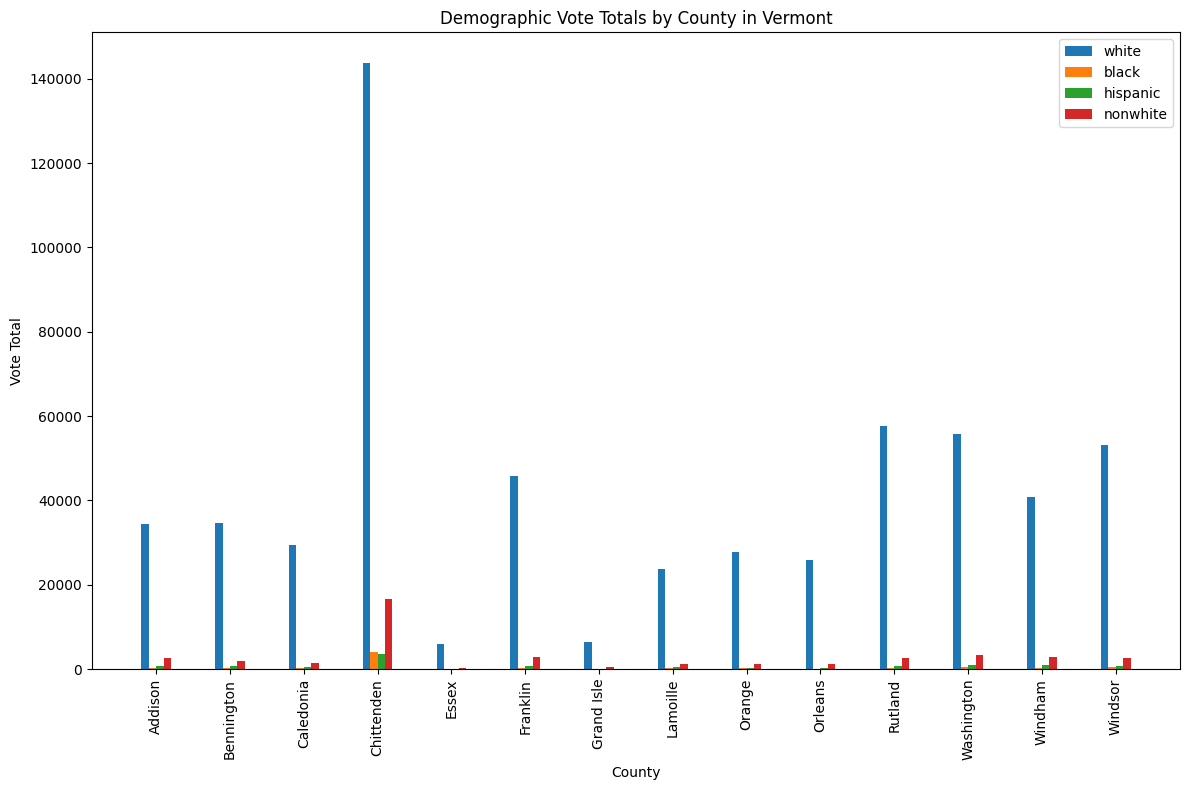

In [ ]:
#Create a histogram of the demographic vote totals for each county in Texas
vermont_df = df_totals[df_totals['state'] == 'Vermont']
demographics = ['white','black','hispanic','nonwhite']
county_demographics = vermont_df.groupby('county')[demographics].sum().reset_index()

# Get a list of unique counties
counties = county_demographics['county'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.1
bar_positions = np.arange(len(counties))

# Plot each demographic as a separate bar
for i, demographic in enumerate(demographics):
    ax.bar(bar_positions + i * bar_width, county_demographics[demographic], width=bar_width, label=demographic)

# Customize the plot
ax.set_title('Demographic Vote Totals by County in Vermont')
ax.set_xlabel('County')
ax.set_ylabel('Vote Total')
ax.set_xticks(bar_positions + bar_width * (len(demographics) -1)/ 2) # Center x-axis ticks
ax.set_xticklabels(counties, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()

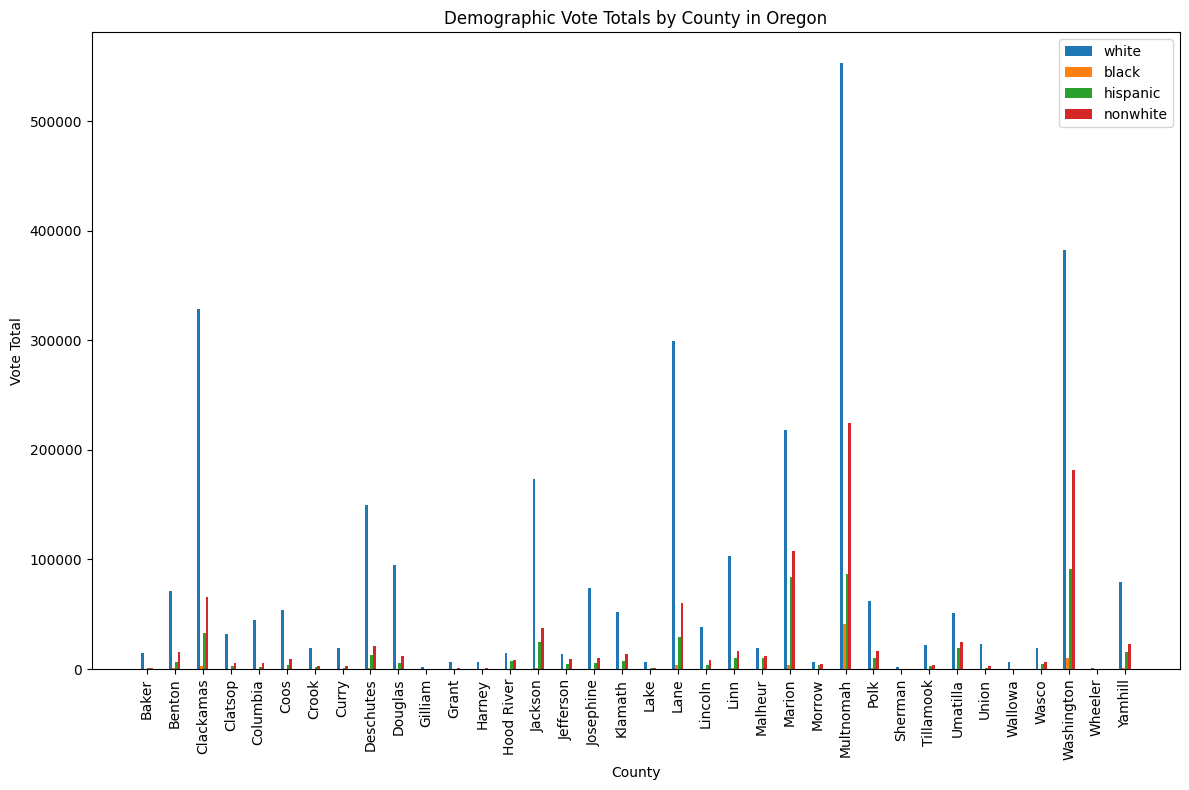

In [ ]:
oregon_df = df_totals[df_totals['state'] == 'Oregon']
demographics = ['white','black','hispanic','nonwhite']
county_demographics = oregon_df.groupby('county')[demographics].sum().reset_index()

# Get a list of unique counties
counties = county_demographics['county'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.1
bar_positions = np.arange(len(counties))

# Plot each demographic as a separate bar
for i, demographic in enumerate(demographics):
    ax.bar(bar_positions + i * bar_width, county_demographics[demographic], width=bar_width, label=demographic)

# Customize the plot
ax.set_title('Demographic Vote Totals by County in Oregon')
ax.set_xlabel('County')
ax.set_ylabel('Vote Total')
ax.set_xticks(bar_positions + bar_width * (len(demographics) -1)/ 2) # Center x-axis ticks
ax.set_xticklabels(counties, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()

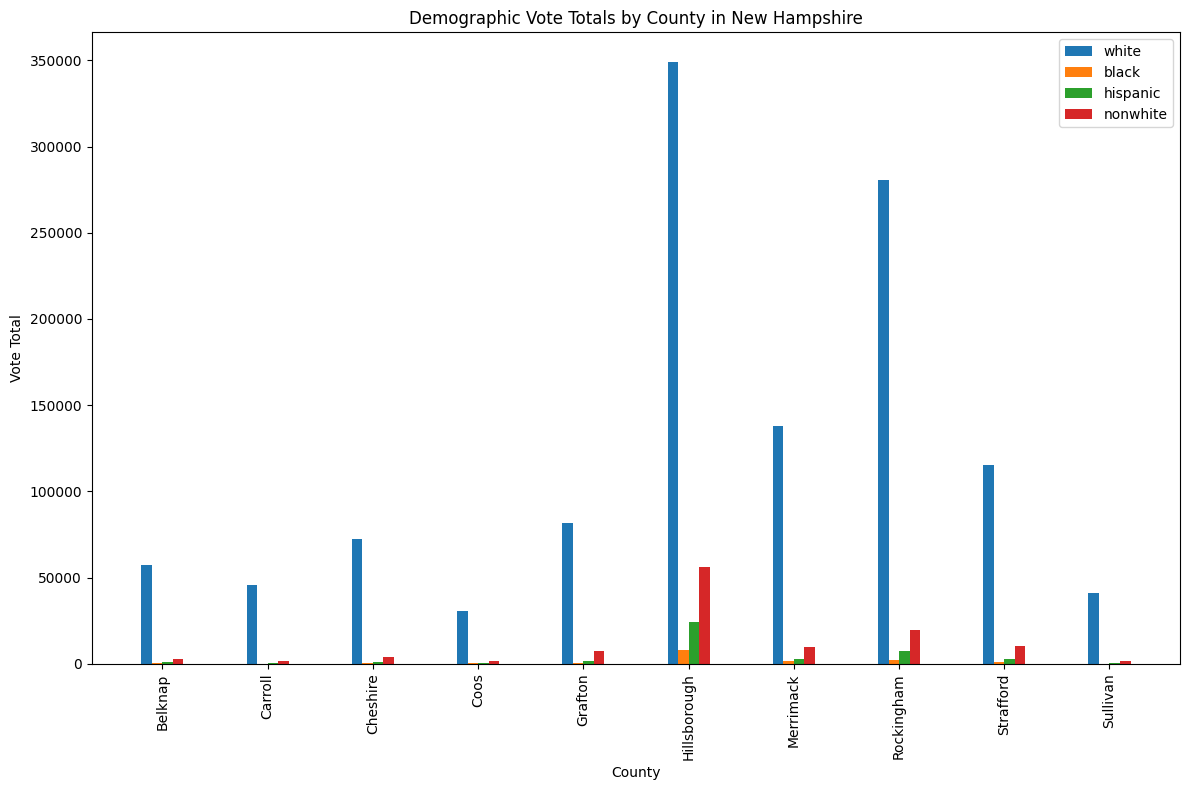

In [ ]:
newhamp_df = df_totals[df_totals['state'] == 'New Hampshire']
demographics = ['white','black','hispanic','nonwhite']
county_demographics = newhamp_df.groupby('county')[demographics].sum().reset_index()

# Get a list of unique counties
counties = county_demographics['county'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.1
bar_positions = np.arange(len(counties))

# Plot each demographic as a separate bar
for i, demographic in enumerate(demographics):
    ax.bar(bar_positions + i * bar_width, county_demographics[demographic], width=bar_width, label=demographic)

# Customize the plot
ax.set_title('Demographic Vote Totals by County in New Hampshire')
ax.set_xlabel('County')
ax.set_ylabel('Vote Total')
ax.set_xticks(bar_positions + bar_width * (len(demographics) -1)/ 2) # Center x-axis ticks
ax.set_xticklabels(counties, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()

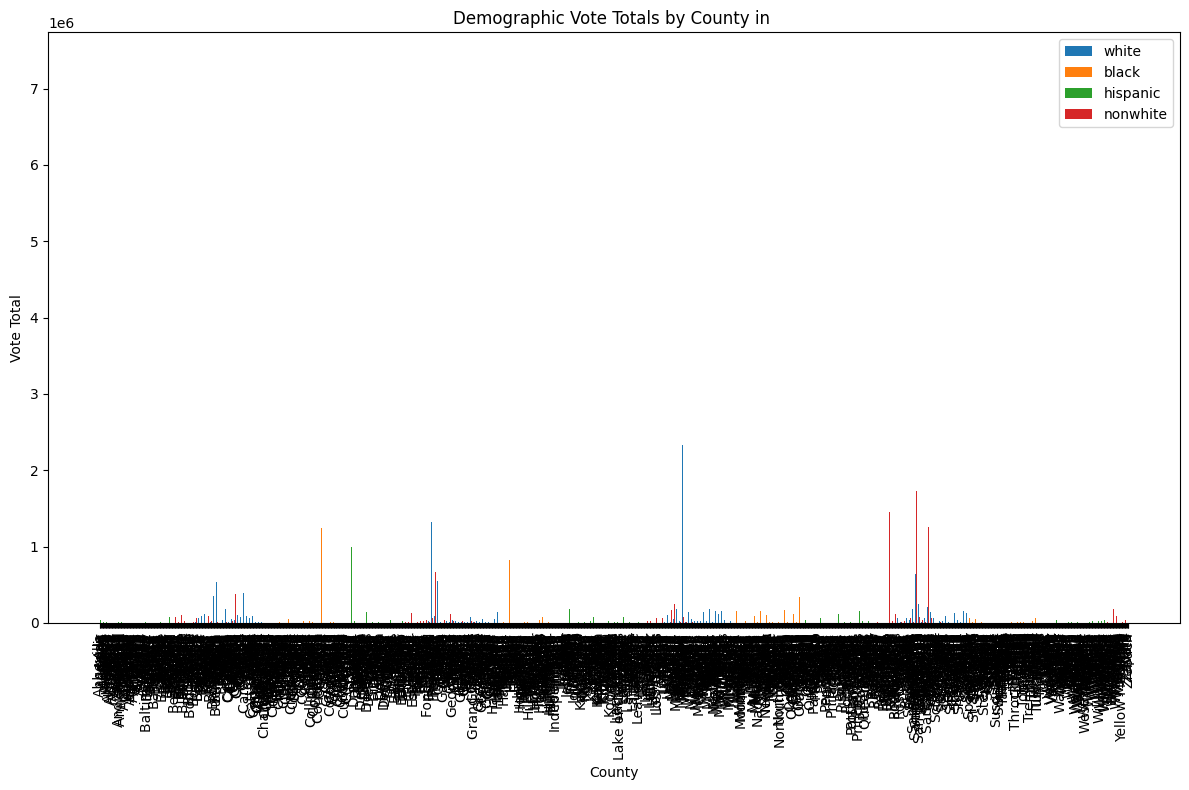

In [ ]:
# Create a histogram of the demographic vote totals for each county against the county
# Group data by county and sum demographic votes
demographics = ['white','black','hispanic','nonwhite']
county_demographics = df_totals.groupby('county')[demographics].sum().reset_index()

# Get a list of unique counties
counties = county_demographics['county'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.1
bar_positions = np.arange(len(counties))

# Plot each demographic as a separate bar
for i, demographic in enumerate(demographics):
    ax.bar(bar_positions + i * bar_width, county_demographics[demographic], width=bar_width, label=demographic)

# Customize the plot
ax.set_title('Demographic Vote Totals by County in ')
ax.set_xlabel('County')
ax.set_ylabel('Vote Total')
ax.set_xticks(bar_positions + bar_width * (len(demographics) -1)/ 2) # Center x-axis ticks
ax.set_xticklabels(counties, rotation=90)  # Rotate x-axis labels
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Perform a multivariable linear regression with the input variables: 'median_hh_inc', 'clf_unemploy', 'lesshs','lesscollege'
#and output variables: 'repgov14', 'demgov14', 'othergov14'
import statsmodels.formula.api as sm

df_totals['othergov14'] = othergov
# Create a new column for total governor votes in 2014
df_totals['total_gov14'] = df_totals['repgov14'] + df_totals['demgov14'] + df_totals['othergov14']

# Define the model with 'total_gov14' as the dependent variable
model = sm.ols(formula="total_gov14 ~ median_hh_inc + clf_unemploy + lesshs + lesscollege", data=df_totals)

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            total_gov14   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5697.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:47:15   Log-Likelihood:                -16274.
No. Observations:                1440   AIC:                         3.256e+04
Df Residuals:                    1435   BIC:                         3.258e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.591e+04   2097.723     -7.586

In [ ]:
import statsmodels.formula.api as sm

# Define the model
model = sm.ols(formula="repgov14 ~ median_hh_inc + clf_unemploy + lesshs + lesscollege", data=df_totals)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               repgov14   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     6463.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:47:15   Log-Likelihood:                -22634.
No. Observations:                2148   AIC:                         4.528e+04
Df Residuals:                    2143   BIC:                         4.531e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5422.5094    859.003     -6.313

In [ ]:
import statsmodels.formula.api as sm

# Define the model
model = sm.ols(formula="demgov14 ~ median_hh_inc + clf_unemploy + lesshs + lesscollege", data=df_totals)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               demgov14   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     4459.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        04:47:15   Log-Likelihood:                -23538.
No. Observations:                2148   AIC:                         4.709e+04
Df Residuals:                    2143   BIC:                         4.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.035e+04   1309.005     -7.908

In [ ]:
import statsmodels.formula.api as sm

# Define the model
model = sm.ols(formula="othergov14 ~ median_hh_inc + clf_unemploy + lesshs + lesscollege", data=df_totals)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             othergov14   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     25.66
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.46e-20
Time:                        04:47:15   Log-Likelihood:                -13429.
No. Observations:                1440   AIC:                         2.687e+04
Df Residuals:                    1435   BIC:                         2.689e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1520.2218    290.790      5.228